c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:112: RuntimeWarning: overflow encountered in square
  denom = s**2 + alpha
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value encountered in divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:161: RuntimeWarning: overflow encountered in square
  p = -V.dot(suf / (s**2 + alpha))
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_lsq\common.py:398: RuntimeWarning: invalid value encountered in ca

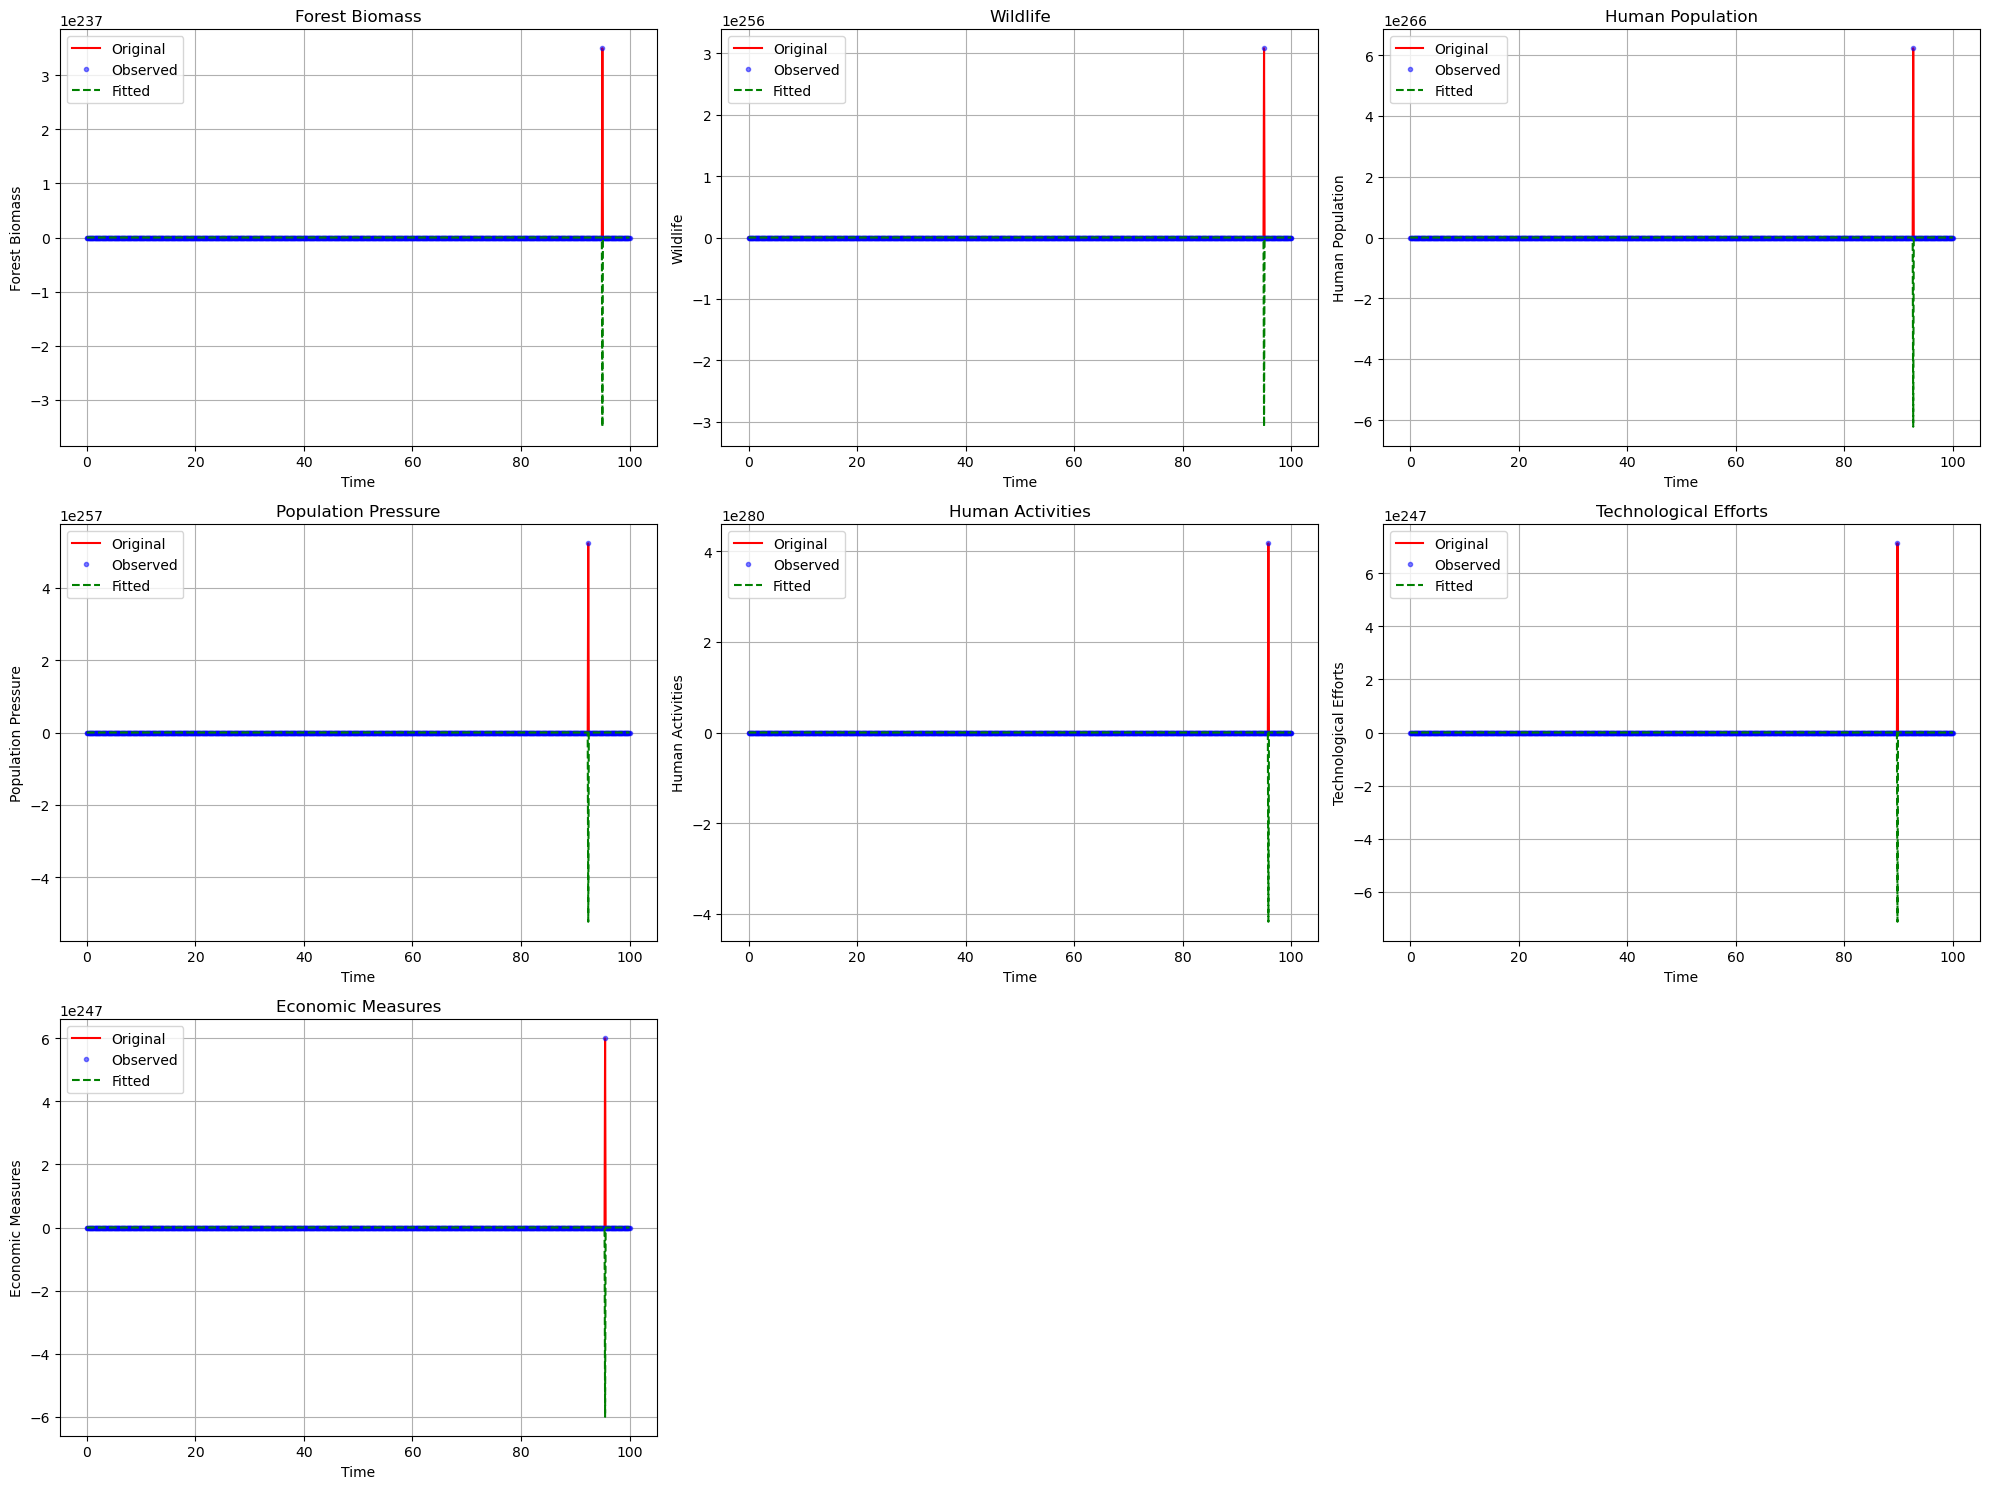


Parameter Comparison:
Parameter | Initial | Fitted | Estimated (Table)
------------------------------------------------------------
s        | 0.879474 | 0.879474
alpha    | 0.048617 | 0.048617
beta1    | 0.003389 | 0.003389
beta2    | 0.001000 | 0.001000
rho2     | 0.019063 | 0.019063
r        | 0.857855 | 0.857855
v1       | 0.002632 | 0.002632
v2       | 0.001000 | 0.001000
theta    | 0.453053 | 0.453053
lambda   | 0.055426 | 0.055426
sigma    | 0.001000 | 0.001000
phi      | 0.090685 | 0.090685
phi0     | 0.524196 | 0.524196
phi1     | 0.006173 | 0.006173
gamma    | 0.002620 | 0.002620
pi       | 0.001775 | 0.001775
phi2     | 0.159487 | 0.159487
gamma1   | 0.010628 | 0.010628
rho      | 0.008184 | 0.008184
rho1     | 0.021526 | 0.021526
omega    | 0.064656 | 0.064656
omega1   | 0.095484 | 0.095484


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.integrate import odeint
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def model_forest_biomass(X, t, params):
    """Model with base parameters instead of combined parameters"""
    Y = np.zeros(7)
    
    # Base parameters from table
    s = params[0]      # 0.8
    alpha = params[1]  # 0.05
    beta1 = params[2]  # 0.003
    beta2 = params[3]  # 0.0004
    rho2 = params[4]   # 0.02
    r = params[5]      # 0.9
    v1 = params[6]     # 0.002
    v2 = params[7]     # 0.0001
    theta = params[8]  # 0.5
    lambda_val = params[9]  # 0.05
    sigma = params[10] # 0.001
    phi = params[11]   # 0.1
    phi0 = params[12]  # 0.5
    phi1 = params[13]  # 0.01
    gamma = params[14] # 0.004
    pi_val = params[15] # 0.002
    phi2 = params[16]  # 0.2
    gamma1 = params[17] # 0.01
    rho = params[18]   # 0.01
    rho1 = params[19]  # 0.03
    omega = params[20] # 0.05
    omega1 = params[21] # 0.1
    
    # State variables
    B = X[0]  # Forest Biomass
    W = X[1]  # Wildlife
    N = X[2]  # Human Population
    P = X[3]  # Population Pressure
    H = X[4]  # Human Activities
    T = X[5]  # Technological Efforts
    E = X[6]  # Economic Measures

    # Differential equations using base parameters
    Y[0] = -s*B - alpha*B*W - beta1*B*N - beta2*(B**2)*H + rho2*B*T
    Y[1] = r*W*(1 - W/B) - v1*W*N - v2*W*H
    Y[2] = theta*N*(1 - N) + lambda_val*beta1*B*N - sigma*N*W
    Y[3] = phi*N - phi0*P - phi1*P*E
    Y[4] = gamma*N + pi_val*beta2*(B**2)*H + phi2*P - gamma1*H
    Y[5] = rho*(1 - B) - rho1*T
    Y[6] = omega*P - omega1*E
    
    return Y

def generate_gaussian_params(n_samples=100):
    """Generate parameters using Gaussian distribution based on table values"""
    np.random.seed(42)
    
    # Parameter values from table
    param_means = [
        0.8,    # s
        0.05,   # alpha
        0.003,  # beta1
        0.0004, # beta2
        0.02,   # rho2
        0.9,    # r
        0.002,  # v1
        0.0001, # v2
        0.5,    # theta
        0.05,   # lambda
        0.001,  # sigma
        0.1,    # phi
        0.5,    # phi0
        0.01,   # phi1
        0.004,  # gamma
        0.002,  # pi
        0.2,    # phi2
        0.01,   # gamma1
        0.01,   # rho
        0.03,   # rho1
        0.05,   # omega
        0.1     # omega1
    ]
    
    # Standard deviation as 20% of mean
    param_stds = [mean * 0.2 for mean in param_means]
    
    # Generate parameters
    params_data = np.zeros((n_samples, len(param_means)))
    for i in range(len(param_means)):
        params_data[:, i] = np.maximum(0.001, np.random.normal(
            param_means[i], 
            param_stds[i], 
            n_samples
        ))
    
    param_names = [
        's', 'alpha', 'beta1', 'beta2', 'rho2', 'r', 'v1', 'v2', 
        'theta', 'lambda', 'sigma', 'phi', 'phi0', 'phi1', 'gamma',
        'pi', 'phi2', 'gamma1', 'rho', 'rho1', 'omega', 'omega1'
    ]
    
    return pd.DataFrame(params_data, columns=param_names)

# Generate synthetic data
t = np.linspace(0, 100, 1000)
X0 = [1.0, 0.5, 0.3, 0.2, 0.1, 0.1, 0.1]

# Generate parameters and create original solution
synthetic_params = generate_gaussian_params(n_samples=1)
initial_params = synthetic_params.iloc[0].values
original_solution = odeint(model_forest_biomass, X0, t, args=(tuple(initial_params),))

# Add noise to create observed data
np.random.seed(42)
noise_level = 0.05
observed_data = original_solution + noise_level * np.random.randn(*original_solution.shape)

# Least squares fitting function
def objective_function(params, t, observed_data):
    """Objective function for least squares optimization"""
    try:
        solution = odeint(model_forest_biomass, X0, t, args=(tuple(params),))
        return (solution - observed_data).ravel()
    except:
        return 1e6 * np.ones(len(t) * 7)

# Define bounds based on table values
lower_bounds = [param * 0.5 for param in initial_params]  # 50% of initial value
upper_bounds = [param * 1.5 for param in initial_params]  # 150% of initial value

# Perform least squares fitting
result = least_squares(objective_function, initial_params, 
                      args=(t, observed_data),
                      bounds=(lower_bounds, upper_bounds),
                      method='trf')

fitted_params = result.x
fitted_solution = odeint(model_forest_biomass, X0, t, args=(tuple(fitted_params),))

# Plot results
variables = [
    'Forest Biomass', 'Wildlife', 'Human Population', 
    'Population Pressure', 'Human Activities',
    'Technological Efforts', 'Economic Measures'
]

plt.figure(figsize=(20, 15))
for i in range(7):
    plt.subplot(3, 3, i+1)
    plt.plot(t, original_solution[:, i], 'r-', label='Original')
    plt.plot(t, observed_data[:, i], 'b.', label='Observed', alpha=0.5)
    plt.plot(t, fitted_solution[:, i], 'g--', label='Fitted')
    plt.xlabel('Time')
    plt.ylabel(variables[i])
    plt.title(f'{variables[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print parameter comparison
param_names = [
    's', 'alpha', 'beta1', 'beta2', 'rho2', 'r', 'v1', 'v2', 
    'theta', 'lambda', 'sigma', 'phi', 'phi0', 'phi1', 'gamma',
    'pi', 'phi2', 'gamma1', 'rho', 'rho1', 'omega', 'omega1'
]

print("\nParameter Comparison:")
print("Parameter | Initial | Fitted | Estimated (Table)")
print("-" * 60)
for name, init, fit in zip(param_names, initial_params, fitted_params):
    print(f"{name:8} | {init:8.6f} | {fit:8.6f}")

In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Model function sama dengan di atas
def model_forest_biomass(X, t, params):
    """Model with base parameters instead of combined parameters"""
    Y = np.zeros(7)
    
    # Base parameters from table
    s = params[0]      # 0.8
    alpha = params[1]  # 0.05
    beta1 = params[2]  # 0.003
    beta2 = params[3]  # 0.0004
    rho2 = params[4]   # 0.02
    r = params[5]      # 0.9
    v1 = params[6]     # 0.002
    v2 = params[7]     # 0.0001
    theta = params[8]  # 0.5
    lambda_val = params[9]  # 0.05
    sigma = params[10] # 0.001
    phi = params[11]   # 0.1
    phi0 = params[12]  # 0.5
    phi1 = params[13]  # 0.01
    gamma = params[14] # 0.004
    pi_val = params[15] # 0.002
    phi2 = params[16]  # 0.2
    gamma1 = params[17] # 0.01
    rho = params[18]   # 0.01
    rho1 = params[19]  # 0.03
    omega = params[20] # 0.05
    omega1 = params[21] # 0.1
    
    # State variables
    B = X[0]  # Forest Biomass
    W = X[1]  # Wildlife
    N = X[2]  # Human Population
    P = X[3]  # Population Pressure
    H = X[4]  # Human Activities
    T = X[5]  # Technological Efforts
    E = X[6]  # Economic Measures

    # Differential equations using base parameters
    Y[0] = -s*B - alpha*B*W - beta1*B*N - beta2*(B**2)*H + rho2*B*T
    Y[1] = r*W*(1 - W/B) - v1*W*N - v2*W*H
    Y[2] = theta*N*(1 - N) + lambda_val*beta1*B*N - sigma*N*W
    Y[3] = phi*N - phi0*P - phi1*P*E
    Y[4] = gamma*N + pi_val*beta2*(B**2)*H + phi2*P - gamma1*H
    Y[5] = rho*(1 - B) - rho1*T
    Y[6] = omega*P - omega1*E
    
    return Y

def generate_uniform_params(n_samples=100):
    """Generate parameters using uniform distribution based on table values"""
    np.random.seed(42)
    
    # Parameter ranges based on table values
    param_ranges = [
        (0.6, 1.0),    # s
        (0.03, 0.07),  # alpha
        (0.002, 0.004), # beta1
        (0.0003, 0.0005), # beta2
        (0.015, 0.025), # rho2
        (0.7, 1.1),    # r
        (0.001, 0.003), # v1
        (0.00005, 0.00015), # v2
        (0.4, 0.6),    # theta
        (0.03, 0.07),  # lambda
        (0.0005, 0.0015), # sigma
        (0.08, 0.12),  # phi
        (0.4, 0.6),    # phi0
        (0.005, 0.015), # phi1
        (0.003, 0.005), # gamma
        (0.001, 0.003), # pi
        (0.15, 0.25),  # phi2
        (0.008, 0.012), # gamma1
        (0.008, 0.012), # rho
        (0.02, 0.04),  # rho1
        (0.04, 0.06),  # omega
        (0.08, 0.12)   # omega1
    ]
    
    params_data = np.zeros((n_samples, len(param_ranges)))
    for i, (min_val, max_val) in enumerate(param_ranges):
        params_data[:, i] = np.random.uniform(min_val, max_val, n_samples)
    
    param_names = [
        's', 'alpha', 'beta1', 'beta2', 'rho2', 'r', 'v1', 'v2', 
        'theta', 'lambda', 'sigma', 'phi', 'phi0', 'phi1', 'gamma',
        'pi', 'phi2', 'gamma1', 'rho', 'rho1', 'omega', 'omega1'
    ]
    
    return pd.DataFrame(params_data, columns=param_names)

# Generate synthetic data
t = np.linspace(0, 100, 1000)
X0 = [1.0, 0.5, 0.3, 0.2, 0.1, 0.1, 0.1]

# Generate parameters and create original solution
uniform_params = generate_uniform_params(n_samples=1)
initial_params = uniform_params.iloc[0].values
original_solution = odeint(model_forest_biomass, X0, t, args=(tuple(initial_params),))

# Add noise to create observed data
np.random.seed(42)
noise_level = 0.05
observed_data = original_solution + noise_level * np.random.randn(*original_solution.shape)

# Least squares fitting function
def objective_function(params, t, observed_data):
    """Objective function for least squares optimization"""
    try:
        solution = odeint(model_forest_biomass, X0, t, args=(tuple(params),))
        return (solution - observed_data).ravel()
    except:
        return 1e6 * np.ones(len(t) * 7)

# Define bounds based on parameter ranges from generate_uniform_params
param_ranges = [
    (0.6, 1.0),    # s
    (0.03, 0.07),  # alpha
    (0.002, 0.004), # beta1
    (0.0003, 0.0005), # beta2
    (0.015, 0.025), # rho2
    (0.7, 1.1),    # r
    (0.001, 0.003), # v1
    (0.00005, 0.00015), # v2
    (0.4, 0.6),    # theta
    (0.03, 0.07),  # lambda
    (0.0005, 0.0015), # sigma
    (0.08, 0.12),  # phi
    (0.4, 0.6),    # phi0
    (0.005, 0.015), # phi1
    (0.003, 0.005), # gamma
    (0.001, 0.003), # pi
    (0.15, 0.25),  # phi2
    (0.008, 0.012), # gamma1
    (0.008, 0.012), # rho
    (0.02, 0.04),  # rho1
    (0.04, 0.06),  # omega
    (0.08, 0.12)   # omega1
]

lower_bounds = [range[0] for range in param_ranges]
upper_bounds = [range[1] for range in param_ranges]

# Perform least squares fitting
result = least_squares(objective_function, initial_params, 
                      args=(t, observed_data),
                      bounds=(lower_bounds, upper_bounds),
                      method='trf')

fitted_params = result.x
fitted_solution = odeint(model_forest_biomass, X0, t, args=(tuple(fitted_params),))

# Plot results
variables = [
    'Forest Biomass', 'Wildlife', 'Human Population', 
    'Population Pressure', 'Human Activities',
    'Technological Efforts', 'Economic Measures'
]

plt.figure(figsize=(20, 15))
for i in range(7):
    plt.subplot(3, 3, i+1)
    plt.plot(t, original_solution[:, i], 'r-', label='Original')
    plt.plot(t, observed_data[:, i], 'b.', label='Observed', alpha=0.5)
    plt.plot(t, fitted_solution[:, i], 'g--', label='Fitted')
    plt.xlabel('Time')
    plt.ylabel(variables[i])
    plt.title(f'{variables[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print parameter comparison
param_names = [
    's', 'alpha', 'beta1', 'beta2', 'rho2', 'r', 'v1', 'v2', 
    'theta', 'lambda', 'sigma', 'phi', 'phi0', 'phi1', 'gamma',
    'pi', 'phi2', 'gamma1', 'rho', 'rho1', 'omega', 'omega1'
]

print("\nParameter Comparison:")
print("Parameter | Initial | Fitted | Range")
print("-" * 60)
for name, init, fit, (min_val, max_val) in zip(param_names, initial_params, fitted_params, param_ranges):
    print(f"{name:8} | {init:8.6f} | {fit:8.6f} | [{min_val:8.6f}, {max_val:8.6f}]")

c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:598: RuntimeWarning: overflow encountered in divide
  J_transposed[i] = df / dx


ValueError: array must not contain infs or NaNs